In [1]:
import pandas as pd
import numpy as np
import plotly

In [141]:
data = pd.read_csv('SharedResponsesSurvey.csv')

/home/taran/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,8,9,10,11,12,17,20,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [142]:
data = data[['ScenarioOrder','ScenarioTypeStrict', 'Saved','Review_age', 'Review_gender','UserCountry3']]


In [16]:
data = data.dropna()
data

,ScenarioOrder,ScenarioTypeStrict,Saved,Review_age,Review_gender,UserCountry3
0,13.0,Gender,1.0,32.0,male,RUS
1,8.0,Fitness,0.0,32.0,male,RUS
2,2.0,Age,0.0,32.0,male,RUS
3,1.0,Species,0.0,32.0,male,RUS
4,5.0,Fitness,0.0,32.0,male,RUS
...,...,...,...,...,...,...
149994,11.0,Gender,0.0,39.0,male,DEU
149995,2.0,Random,0.0,39.0,male,DEU
149996,1.0,Species,1.0,32.0,male,TUR
149997,12.0,Gender,0.0,32.0,male,TUR


In [42]:
data = data[(data['ScenarioOrder'] >= 1) & (data['ScenarioOrder'] <= 6)]
scenario_1 = data[(data['ScenarioOrder'] == 1)]
scenario_gender = data[(data['ScenarioTypeStrict'] == "Gender")]
scenario_1.dropna()
scenario_2 = data[(data['ScenarioOrder'] == 2)]
scenario_3 = data[(data['ScenarioOrder'] == 3)]
scenario_4 = data[(data['ScenarioOrder'] == 4)]
scenario_5 = data[(data['ScenarioOrder'] == 5)]
scenario_6 = data[(data['ScenarioOrder'] == 6)]
scenario_gender.shape

(10409, 6)

In [43]:
######ONE HOT ENCODING THE DATA######
scenario_type = pd.get_dummies(scenario_gender['ScenarioTypeStrict'])
scenario_gender = scenario_gender.drop('ScenarioTypeStrict', 1)

scenario_gender1 = pd.get_dummies(scenario_gender['Review_gender'])
scenario_gender = scenario_gender.drop('Review_gender', 1)
scenario_gender1

,default,female,male,others
16,0,0,1,0
28,0,0,1,0
30,0,0,1,0
34,0,0,1,0
41,0,0,1,0
...,...,...,...,...
149944,0,1,0,0
149954,0,0,1,0
149970,0,0,1,0
149973,0,0,1,0


In [44]:
scenario_gender = scenario_gender.replace([np.inf, -np.inf], np.nan)
scenario_gender = scenario_gender.dropna()

In [47]:
scenario_gender= pd.concat([scenario_gender, scenario_type], axis = 1)
scenario_gender = pd.concat([scenario_gender, scenario_gender1], axis = 1)
scenario_gender.dropna()
#scenario_1 = scenario_1.drop('Review_age', 1)

,ScenarioOrder,Saved,Review_age,UserCountry3,Gender,default,female,male,others,Gender,default,female,male,others
16,2.0,1.0,23.0,BEL,1,0,0,1,0,1,0,0,1,0
28,3.0,1.0,15.0,GHA,1,0,0,1,0,1,0,0,1,0
30,2.0,1.0,15.0,GHA,1,0,0,1,0,1,0,0,1,0
34,3.0,0.0,15.0,BRA,1,0,0,1,0,1,0,0,1,0
41,5.0,0.0,15.0,BRA,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149944,6.0,0.0,15.0,AUT,1,0,1,0,0,1,0,1,0,0
149954,5.0,0.0,15.0,MEX,1,0,0,1,0,1,0,0,1,0
149970,6.0,0.0,18.0,USA,1,0,0,1,0,1,0,0,1,0
149973,1.0,0.0,26.0,USA,1,0,0,1,0,1,0,0,1,0


In [54]:
scenario_gender = scenario_gender.dropna()
print(scenario_1.isnull().values.any())
Y = scenario_gender['Saved']
X = scenario_gender[['female','male', 'Review_age']]
print(X)
#SKLEARN PRED
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler=MinMaxScaler()
#X_train=scaler.fit_transform(X_train)
#y_train=np.log(1+y_train)
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

#X_test_sc=scaler.fit_transform(X_test)
#y_test_sc=np.log(1+y_test)
y_test=y_test/max(y_test)
y_train=y_train/max(y_train)
lr = LogisticRegression()
print("OKAY")
lr.fit(X_train, y_train)

False
        female  female  male  male  Review_age
16           0       0     1     1        23.0
28           0       0     1     1        15.0
30           0       0     1     1        15.0
34           0       0     1     1        15.0
41           0       0     1     1        15.0
...        ...     ...   ...   ...         ...
149944       1       1     0     0        15.0
149954       0       0     1     1        15.0
149970       0       0     1     1        18.0
149973       0       0     1     1        26.0
149978       0       0     1     1        26.0

[10408 rows x 5 columns]
OKAY


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
X_test.shape

(2602, 5)

In [56]:
predictions = lr.predict(X_test)

In [57]:
from sklearn import metrics 
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy_percentage = 100 * accuracy
accuracy_percentage

56.456571867794004

In [52]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1469    0]
 [1133    0]]


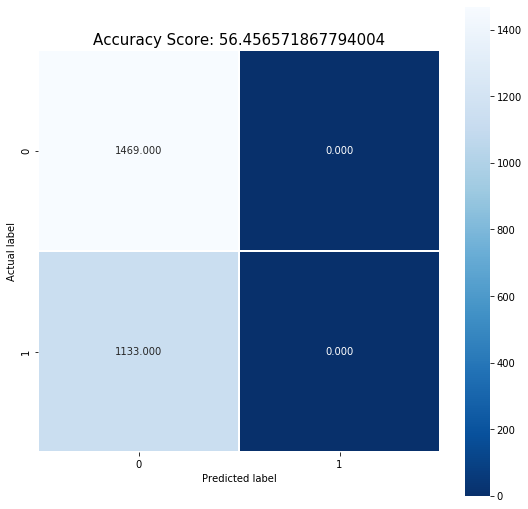

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_percentage)
plt.title(all_sample_title, size = 15);

XGBOOST TRIALS

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
#xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.9,learning_rate=0.3, max_depth=16,alpha= 15, n_estimators=19)
xg_classifier = XGBClassifier(objective='binary:logistic')
#xg_classifier.fit(X_train,y_train)

colsample_bytree =  [0.1,0.3,0.5,0.7,0.9] # softmax, softplus, softsign 
max_depth = [5,10,15,20,25,30,40,50]
learning_rate = [ 0.1, 0.01, 0.3, 0.9, 0.6, 1.2,1.8]
n_estimators = [10, 20, 50, 100, 200, 500, 1000]
alpha = [10, 5, 2, 15, 20, 25, 30]
##############################################################
param_grid = dict(colsample_bytree=colsample_bytree, max_depth=max_depth,learning_rate=learning_rate, n_estimators=n_estimators, alpha=alpha)
##############################################################
grid = GridSearchCV(estimator=xg_classifier, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train) 



#preds=xg_classifier.predict(x_test)
#print("Mean squared error: ",mean_squared_error(y_test, preds))
#print("r2 score: ", r2_score(y_test, preds))

c:\users\taran\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
grid_result.best_params_

In [ ]:
'''
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
#xg_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.9,learning_rate=0.3, max_depth=16,alpha= 15, n_estimators=19)
xg_classifier = XGBClassifier(objective='binary:logistic')
#xg_classifier.fit(X_train,y_train)

colsample_bytree =  [0.1,0.3,0.5,0.7,0.9] # softmax, softplus, softsign 
max_depth = [5,10,15,20,25,30,40,50]
learning_rate = [ 0.1, 0.01, 0.3, 0.9, 0.6, 1.2,1.8]
n_estimators = [10, 20, 50, 100, 200, 500, 1000]
alpha = [10, 5, 2, 15, 20, 25, 30]
##############################################################
param_grid = dict(colsample_bytree=colsample_bytree, max_depth=max_depth,learning_rate=learning_rate, n_estimators=n_estimators, alpha=alpha)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train) 

'''